<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/implementations/dimensionality_reductionsvd_imgcompress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image compression ~ SVD

In [ ]:
! wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROcm2N1RrcetnuG9WhfdH0zpojmmKUT8GSbA&s

/bin/bash: line 1: s: command not found
--2025-06-18 13:21:50--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROcm2N1RrcetnuG9WhfdH0zpojmmKUT8GSbA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.196.113, 74.125.196.100, 74.125.196.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.196.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573 (4.5K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcROcm2N1RrcetnuG9WhfdH0zpojmmKUT8GSbA’

images?q=tbn:ANd9Gc 100%[===================>]   4.47K  --.-KB/s    in 0s      

2025-06-18 13:21:50 (45.4 MB/s) - ‘images?q=tbn:ANd9GcROcm2N1RrcetnuG9WhfdH0zpojmmKUT8GSbA’ saved [4573/4573]



In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

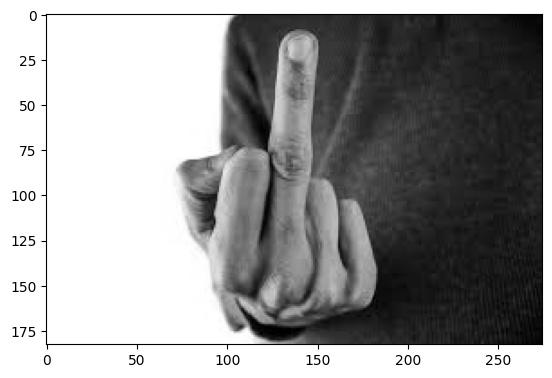

In [ ]:
img = Image.open("/content/mcfk")
imggray = img.convert('LA')
_ = plt.imshow(imggray)

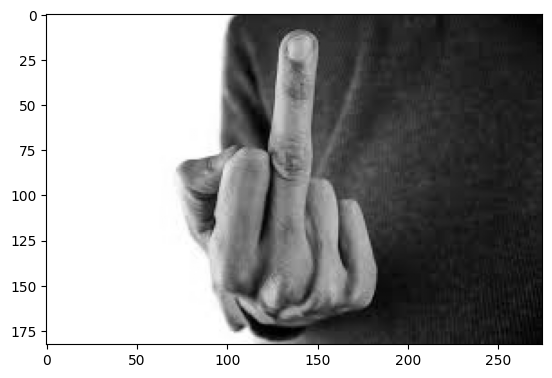

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

# Calculate SVD of the image:

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

Now try to put all three components together and will reconstruct the image from all these 3 components (but yeah this time we'll consider the first singular values only ~ principal components! )

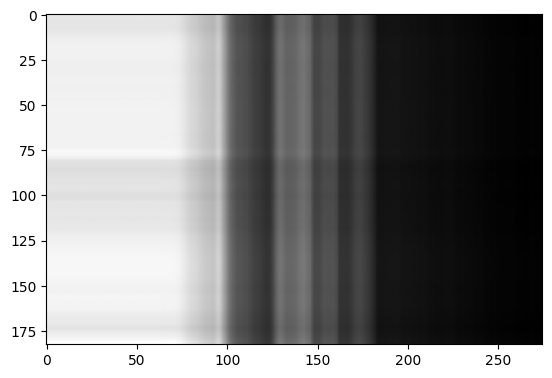

In [ ]:
reconsimg = np.matrix(U[:,:1]) * np.diag(sigma[:1]) * np.matrix(V[:1,:])
_ = plt.imshow(reconsimg, cmap='gray')

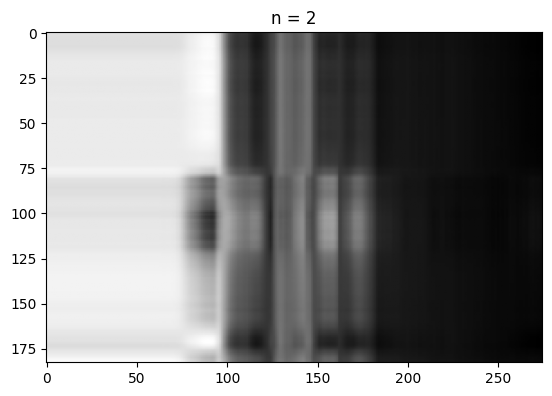

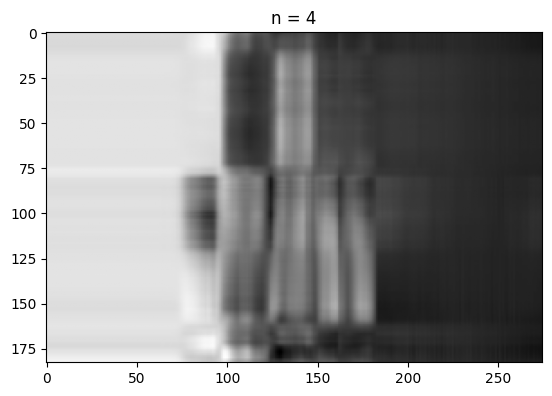

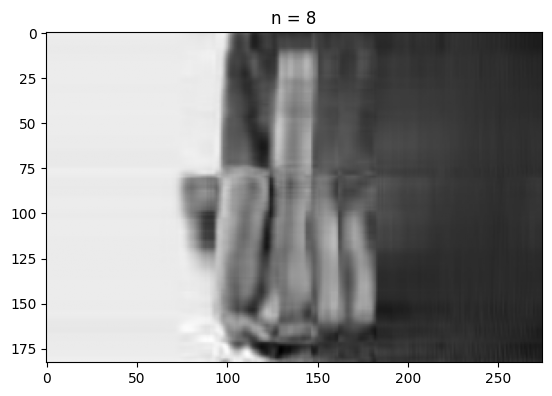

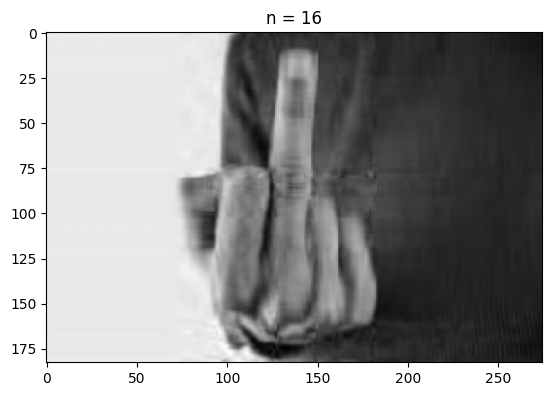

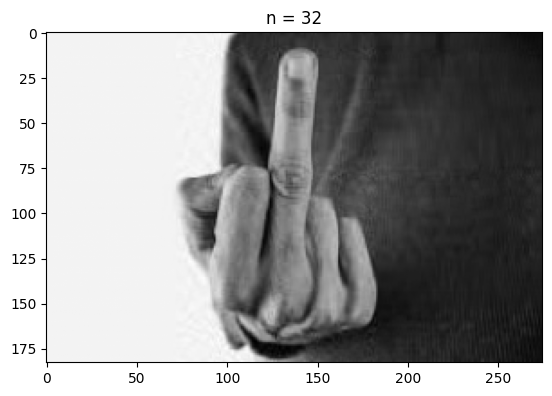

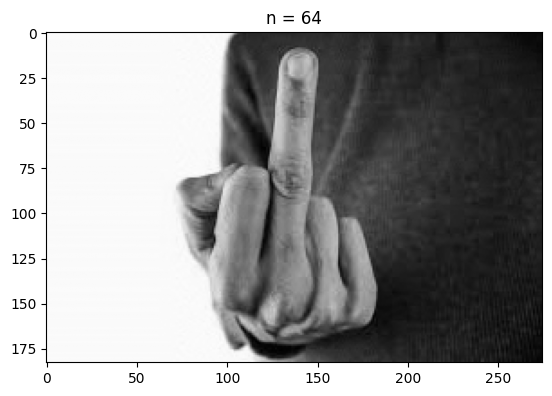

In [ ]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()


In [ ]:
imgmat.shape
full_repr = imgmat.shape[0] * imgmat.shape[1]
full_repr


50325

In [ ]:
"""But, the compressed one with only 64 principal components are there so the full reprsentation will be like this! """
full_repr_reconstimg = 64* reconstimg.shape[0] + 64 + 64* reconstimg.shape[1]
full_repr_reconstimg

29376

In [ ]:
decision = "The compressed image (64x64) retains only {:.2f}% of the original information.".format(full_repr_reconstimg / full_repr * 100)
decision

'The compressed image (64x64) retains only 58.37% of the original information.'